In [2]:
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import numpy as np

In [3]:


# Specify the path to your JSON file
c = "competitions.json"

# Open the JSON file
with open(c, "r") as file:
    data = json.load(file)

# Print the loaded JSON data
data

[{'competition_id': 16,
  'season_id': 4,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'competition_youth': False,
  'competition_international': False,
  'season_name': '2018/2019',
  'match_updated': '2023-03-07T12:20:48.118250',
  'match_updated_360': '2021-06-13T16:17:31.694',
  'match_available_360': None,
  'match_available': '2023-03-07T12:20:48.118250'},
 {'competition_id': 16,
  'season_id': 1,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'competition_youth': False,
  'competition_international': False,
  'season_name': '2017/2018',
  'match_updated': '2021-08-27T11:26:39.802832',
  'match_updated_360': '2021-06-13T16:17:31.694',
  'match_available_360': None,
  'match_available': '2021-01-23T21:55:30.425330'},
 {'competition_id': 16,
  'season_id': 2,
  'country_name': 'Europe',
  'competition_name': 'Champions League',
  'competition_gender': 'male',
  'compe

In [4]:
# Specify the path to your JSON file
file_path = "competitions.json"

# Read the JSON file into a DataFrame
df = pd.read_json(file_path)

# Display the DataFrame
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [5]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Mostrar los valores únicos de cada columna
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(values)
    print()

Columna: competition_id
[  16   37   43 1238   11   49    2   55   53   72]

Columna: season_id
[  4   1   2  27  26  25  24  23  22  21  41  39  37  44  76  90  42 106
   3 108  40  38  43  30]

Columna: country_name
['Europe' 'England' 'International' 'India' 'Spain'
 'United States of America']

Columna: competition_name
['Champions League' "FA Women's Super League" 'FIFA World Cup'
 'Indian Super league' 'La Liga' 'NWSL' 'Premier League' 'UEFA Euro'
 "UEFA Women's Euro" "Women's World Cup"]

Columna: competition_gender
['male' 'female']

Columna: competition_youth
[False]

Columna: competition_international
[False  True]

Columna: season_name
['2018/2019' '2017/2018' '2016/2017' '2015/2016' '2014/2015' '2013/2014'
 '2012/2013' '2011/2012' '2010/2011' '2009/2010' '2008/2009' '2006/2007'
 '2004/2005' '2003/2004' '1999/2000' '2020/2021' '2019/2020' '2022' '2018'
 '2021/2022' '2007/2008' '2005/2006' '2020' '2019']

Columna: match_updated
['2023-03-07T12:20:48.118250' '2021-08-27T11:26:

In [6]:
# Filtrar los partidos de la Women's World Cup
womens_wc_matches = df[df["competition_name"] == "Women's World Cup"]

# Obtener una lista de todos los partidos
match_list = womens_wc_matches["match_available"].tolist()

# Mostrar la lista de partidos
for match in match_list:
    print(match)

2023-04-07T09:00:52.515359


In [7]:
# Order the DataFrame by season_id
df_sorted = df.sort_values(by="season_name")

# Display the sorted DataFrame
df_sorted

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
14,16,76,Europe,Champions League,male,False,False,1999/2000,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
40,2,44,England,Premier League,male,False,False,2003/2004,2023-03-11T10:52:12.579230,2021-06-13T16:17:31.694,None,2023-03-11T10:52:12.579230
13,16,44,Europe,Champions League,male,False,False,2003/2004,2022-11-24T21:06:10.454916,2021-06-13T16:17:31.694,None,2022-11-24T21:06:10.454916
37,11,37,Spain,La Liga,male,False,False,2004/2005,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
12,16,37,Europe,Champions League,male,False,False,2004/2005,2021-04-01T06:18:57.459032,2021-06-13T16:17:31.694,None,2021-04-01T06:18:57.459032
36,11,38,Spain,La Liga,male,False,False,2005/2006,2022-07-03T12:34:31.749038,2021-06-13T16:17:31.694,None,2022-07-03T12:34:31.749038
35,11,39,Spain,La Liga,male,False,False,2006/2007,2023-03-26T23:19:39.125951,2021-06-13T16:17:31.694,None,2023-03-26T23:19:39.125951
11,16,39,Europe,Champions League,male,False,False,2006/2007,2021-03-31T04:18:30.437060,2021-06-13T16:17:31.694,None,2021-03-31T04:18:30.437060
34,11,40,Spain,La Liga,male,False,False,2007/2008,2023-04-19T10:42:35.284291,2021-06-13T16:17:31.694,None,2023-04-19T10:42:35.284291
10,16,41,Europe,Champions League,male,False,False,2008/2009,2021-11-07T14:20:01.699993,2021-06-13T16:17:31.694,None,2021-11-07T14:20:01.699993


In [8]:
partido = sb.events(match_id='69321')

In [9]:
partido.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_outcome', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist',

In [10]:
wwc_df_partidos = sb.matches(competition_id =72,season_id=30).sort_values(by='match_date')

wwc_df_partidos

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
30,22921,2019-06-07,21:00:00.000,International - Women's World Cup,2019,France Women's,Korea Republic Women's,4,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Parc des Princes,Claudia Umpiérrez,Corinne Catherine Diacre,Deuk-Yeo Yoon,1.1.0,2,2
26,22924,2019-06-08,21:00:00.000,International - Women's World Cup,2019,Norway Women's,Nigeria Women's,3,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade Auguste-Delaune II,Kate Jacewicz,Martin Sjögren,Thomas Dennerby,1.1.0,2,2
31,22926,2019-06-08,15:00:00.000,International - Women's World Cup,2019,Germany Women's,China PR Women's,1,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Roazhon Park,Marie-Soleil Beaudoin,Martina Voss-Tecklenburg,Xiuquan Jia,1.1.0,2,2
32,22930,2019-06-08,18:00:00.000,International - Women's World Cup,2019,Spain Women's,South Africa Women's,3,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade Océane,NaN,Jorge Vilda,Desiree Ellis,1.1.0,2,2
21,22936,2019-06-09,18:00:00.000,International - Women's World Cup,2019,England Women's,Scotland Women's,2,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Allianz Riviera,Jana Adamkova,Phil Neville,"Michelle ""Shelley"" Kerr",1.1.0,2,2
1,22933,2019-06-09,13:00:00.000,International - Women's World Cup,2019,Australia Women's,Italy Women's,1,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade du Hainaut,Melissa Borjas,Ante Milicic,Milena Bertolini,1.1.0,2,2
33,22934,2019-06-09,15:30:00.000,International - Women's World Cup,2019,Brazil Women's,Jamaica Women's,3,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade des Alpes,Riem Hussein,Oswaldo Fumeiro Alvarez,Hue Menzies,1.1.0,2,2
4,22940,2019-06-10,18:00:00.000,International - Women's World Cup,2019,Argentina Women's,Japan Women's,0,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Parc des Princes,Stéphanie Frappart,José Carlos Borrello,Asako Takemoto Takakura,1.1.0,2,2
34,22939,2019-06-10,21:00:00.000,International - Women's World Cup,2019,Canada Women's,Cameroon Women's,1,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade de la Mosson,Ok Ri-Hyang,Kenneth Heiner-Møller,Alain Djeumfa,1.1.0,2,2
36,22942,2019-06-11,15:00:00.000,International - Women's World Cup,2019,New Zealand Women's,Netherlands Women's,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade Océane,NaN,Tom Sermanni,Sarina Glotzbach-Wiegman,1.1.0,2,2


In [11]:
match_ids = list(wwc_df_partidos[(wwc_df_partidos['home_team'] == "United States Women's" ) | (wwc_df_partidos['away_team'] == "United States Women's")].match_id.values)
match_ids

[22943, 22974, 68345, 69161, 69202, 69258, 69321]

In [29]:
remates = pd.DataFrame()
for i in match_ids:
    df = sb.events(match_id=i)
    df = df[df['type']=='Shot']
    remates = remates.append(df)
    


In [30]:
remates[['x','y']] = remates.location.apply(pd.Series)
remates[['x','y','location']]

,x,y,location
3251,101.9,44.5,"[101.9, 44.5]"
3252,94.7,30.0,"[94.7, 30.0]"
3253,113.8,37.6,"[113.8, 37.6]"
3254,106.4,38.7,"[106.4, 38.7]"
3255,114.5,38.1,"[114.5, 38.1]"
...,...,...,...
3044,111.6,28.4,"[111.6, 28.4]"
3045,93.1,35.6,"[93.1, 35.6]"
3046,97.6,46.2,"[97.6, 46.2]"
3047,106.3,52.7,"[106.3, 52.7]"


In [31]:
remates.possession_team.value_counts()

United States Women's    134
France Women's            19
England Women's            7
Netherlands Women's        6
Sweden Women's             5
Spain Women's              3
Thailand Women's           2
Chile Women's              1
Name: possession_team, dtype: int64

In [32]:
remates['shot_team'] = np.where(remates['possession_team'] == "United States Women's", "United States Women's", "No USA Women's")
remates.shot_team.value_counts() 

United States Women's    134
No USA Women's            43
Name: shot_team, dtype: int64

In [35]:
remates_usa = remates[remates['shot_team'] == "United States Women's"]
remates_no_usa = remates[remates['shot_team'] != "United States Women's"]
remates_usa.shape

(43, 105)

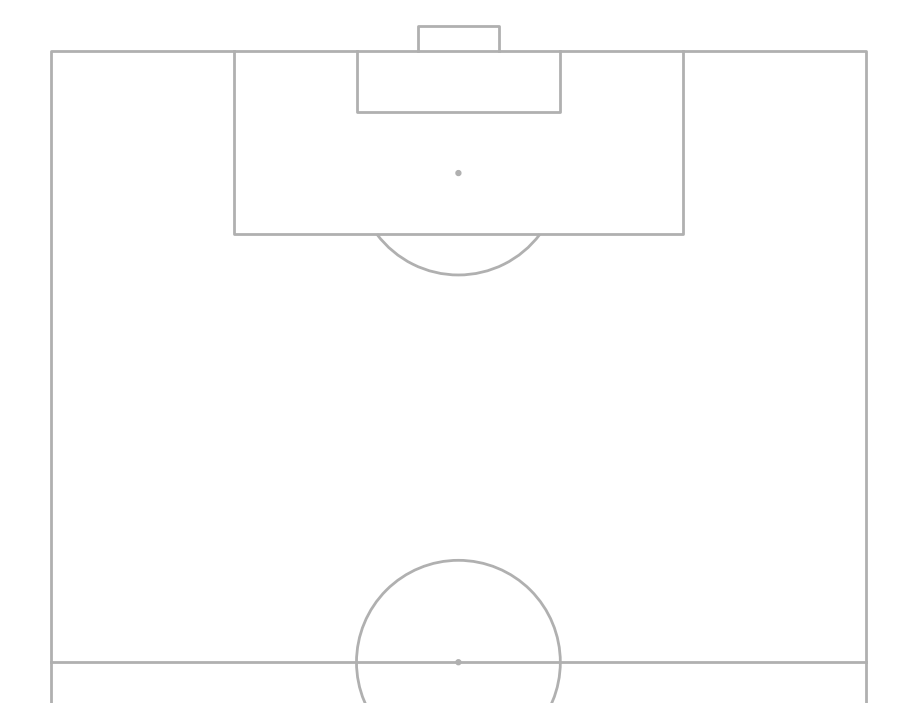

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True
)

pitch.draw(ax=ax)

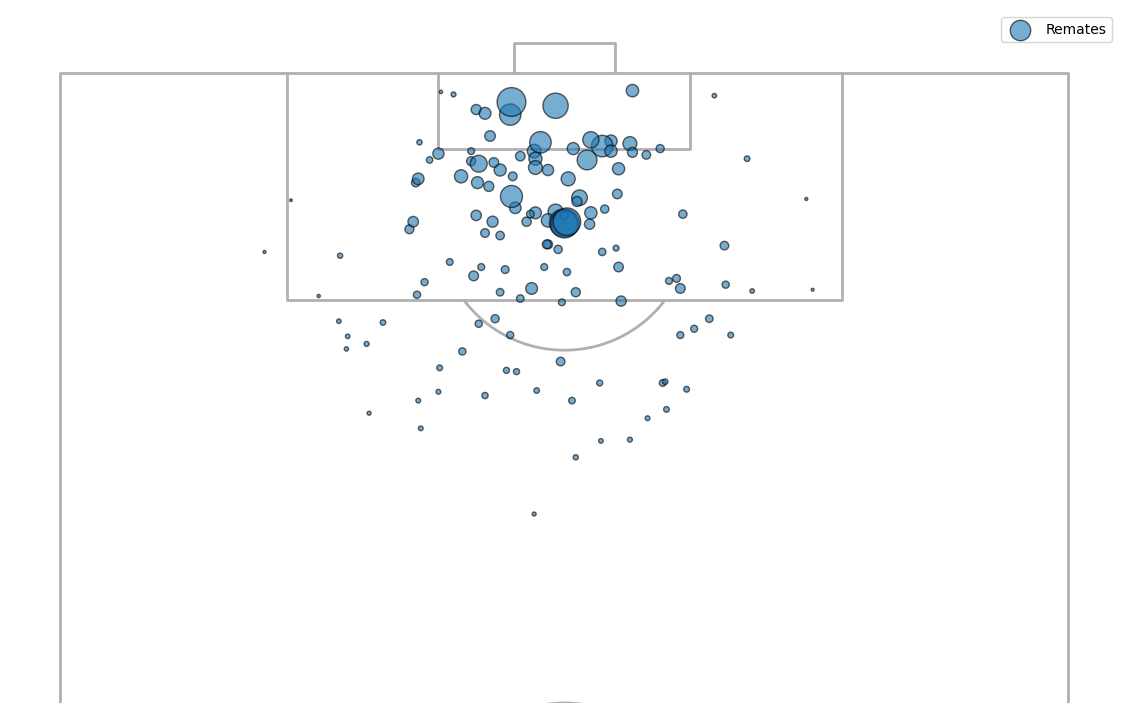

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box'
)

pitch.draw(ax=ax)

plt.ylim(70, 125)

pitch.scatter(remates_usa.x, remates_usa.y, ax=ax, s=remates_usa.shot_statsbomb_xg*500, alpha=.6, ec='black', label='Remates')

plt.legend()

In [26]:
golos_usa = remates_usa[remates_usa.shot_outcome == 'Goal']
no_gol_usa = remates_usa[remates_usa.shot_outcome != 'Goal']
golos_usa.shape, no_gol_usa.shape, remates_usa.shape

((26, 105), (108, 105), (134, 105))

Text(90, 80, '16.98 xG')

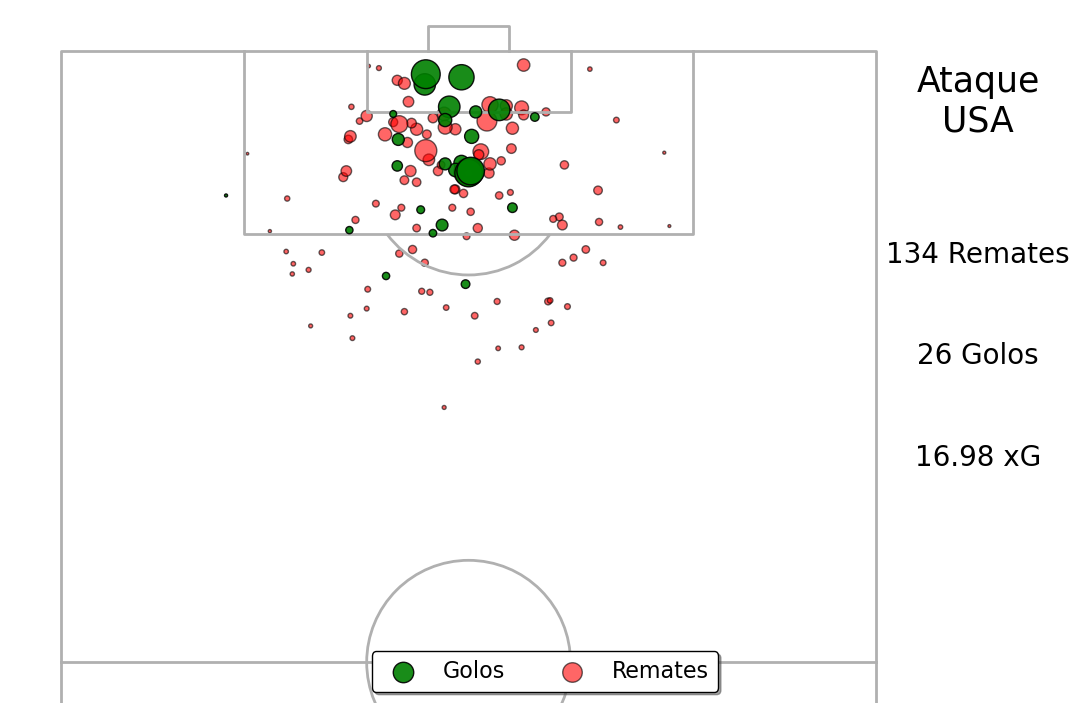

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True
)

pitch.draw(ax=ax)

#plt.ylim(70, 125)
plt.xlim(-5, 100)

pitch.scatter(golos_usa.x, golos_usa.y, ax=ax, s=golos_usa.shot_statsbomb_xg*500, alpha=.9, ec='black', label='Golos', color='green', zorder=.99)
pitch.scatter(no_gol_usa.x, no_gol_usa.y, ax=ax, s=no_gol_usa.shot_statsbomb_xg*500, alpha=.6, ec='black', label='Remates', color='red', zorder=0)

plt.legend(ncol=2, loc='lower center', prop={'size' : 16}, shadow=True, edgecolor='black')

remates = remates_usa.shape[0]
golos = golos_usa.shape[0]
xG_total = remates_usa.shot_statsbomb_xg.sum()

ax.text(90, 115, 'Ataque\nUSA', va='center', ha='center', fontsize=25)
ax.text(90, 100, f'{remates} Remates', va='center', ha='center', fontsize=20)
ax.text(90, 90, f'{golos} Golos', va='center', ha='center', fontsize=20)
ax.text(90, 80, f'{round(xG_total,2)} xG', va='center', ha='center', fontsize=20)

Text(90, 80, '3.52 xG')

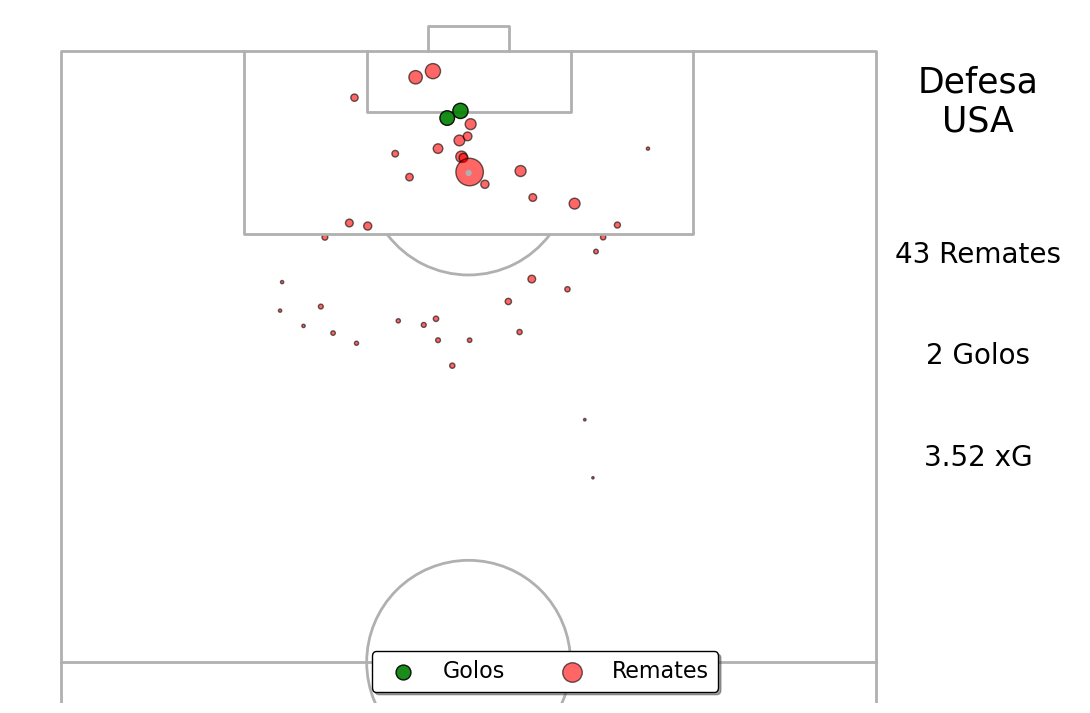

In [36]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    half=True
)

pitch.draw(ax=ax)

#plt.ylim(70, 125)
plt.xlim(-5, 100)

golos_no_usa = remates_no_usa[remates_no_usa.shot_outcome == 'Goal']
no_gol_no_usa = remates_no_usa[remates_no_usa.shot_outcome != 'Goal']

pitch.scatter(golos_no_usa.x, golos_no_usa.y, ax=ax, s=golos_no_usa.shot_statsbomb_xg*500, alpha=.9, ec='black', label='Golos', color='green', zorder=.99)
pitch.scatter(no_gol_no_usa.x, no_gol_no_usa.y, ax=ax, s=no_gol_no_usa.shot_statsbomb_xg*500, alpha=.6, ec='black', label='Remates', color='red', zorder=0)

plt.legend(ncol=2, loc='lower center', prop={'size' : 16}, shadow=True, edgecolor='black')

disparos = remates_no_usa.shape[0]
goles = golos_no_usa.shape[0]
xG_total = remates_no_usa.shot_statsbomb_xg.sum()

ax.text(90, 115, 'Defesa\nUSA', va='center', ha='center', fontsize=25)
ax.text(90, 100, f'{disparos} Remates', va='center', ha='center', fontsize=20)
ax.text(90, 90, f'{goles} Golos', va='center', ha='center', fontsize=20)
ax.text(90, 80, f'{round(xG_total,2)} xG', va='center', ha='center', fontsize=20)